In [13]:
import os
import numpy as np
import cv2
import h5py

import mxnet as mx
from insightface.data.rec_builder import RecBuilder

from tqdm import tqdm

In [20]:
path = "facemask_train.h5"

In [21]:
hf = h5py.File(path,'r')

In [22]:
images = hf['image']
targets = hf['target']
ids = hf['id']

In [23]:
!rm -r test_rec

In [24]:
save_path = "./test_rec/"
wrec = RecBuilder(save_path)

In [25]:
c=0
for index in tqdm(range(len(images))):
    image_rgb = images[index]
    image_bgr = cv2.cvtColor(image_rgb,cv2.COLOR_RGB2BGR)
    lb = int(targets[index])
    lb_id = int(ids[index])
    new_lb = [lb_id,lb]
    
    wrec.add_image(image_bgr,new_lb)
    c+=1
    
    if c>100:
        break

  0%|          | 100/590996 [00:00<05:20, 1846.00it/s]


In [26]:
wrec.close()

stat: 101 0


In [1]:
# read
import mxnet as mx
import numpy as np

In [2]:
path_rec = "train.rec"
path_idx = "train.idx"
imgrec = mx.recordio.MXIndexedRecordIO(path_idx, path_rec, 'r')

In [7]:
s = imgrec.read_idx(0)
header, _ = mx.recordio.unpack(s)
imgidx = np.array(list(imgrec.keys))

In [7]:
labels=[]
#images_encode = []
for index in range(imgidx.shape[0]):
    idx = imgidx[index]
    s = imgrec.read_idx(idx)
    header, img = mx.recordio.unpack(s)
    
    label = header.label
    sample = mx.image.imdecode(img).asnumpy()
    break

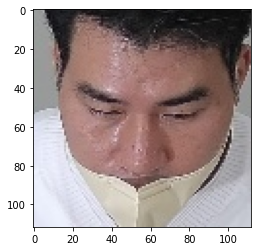

In [8]:
import matplotlib.pyplot as plt

plt.imshow(sample)